# Pengembangan Model Machine Learning untuk Prediksi Attrition
---
* **Nama:** Wildan Mufid Ramadhan
* **Email:** wildan.20nov@gmail.com
* **Dicoding ID:** wildan.20nov@gmail.com

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Memuat Data

In [2]:
df = pd.read_csv("data/employee_data.csv")
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

## 2. Data Understanding

In [4]:
df.isnull().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [5]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 3. EDA

Distribusi Attrition:
Attrition
No     1291
Yes     179
Name: count, dtype: int64

Attrition Rate: 12.18%


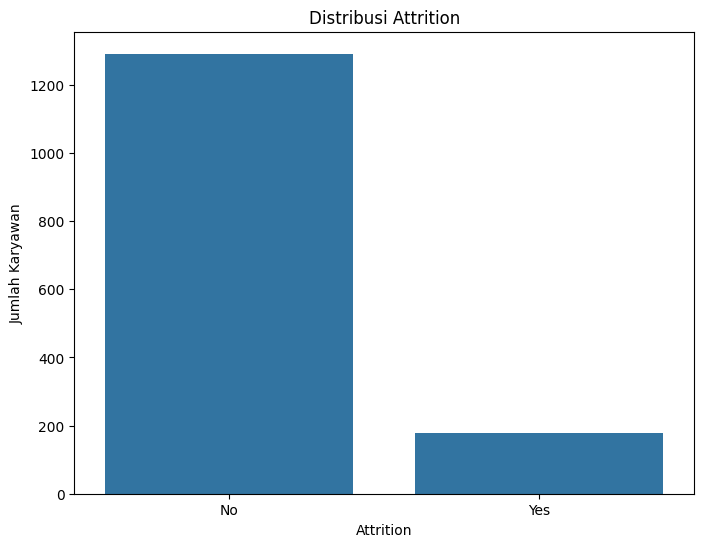

In [ ]:
print("Distribusi Attrition:")
if df['Attrition'].dtype == float:
    df['Attrition'] = df['Attrition'].apply(lambda x: 'Yes' if x == 1 else 'No')

attrition_counts = df['Attrition'].value_counts()
print(attrition_counts)

attrition_rate = (attrition_counts['Yes'] / len(df)) * 100
print(f"\nAttrition Rate: {attrition_rate:.2f}%")

plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df)
plt.title('Distribusi Attrition')
plt.xlabel('Attrition')
plt.ylabel('Jumlah Karyawan')
plt.show()

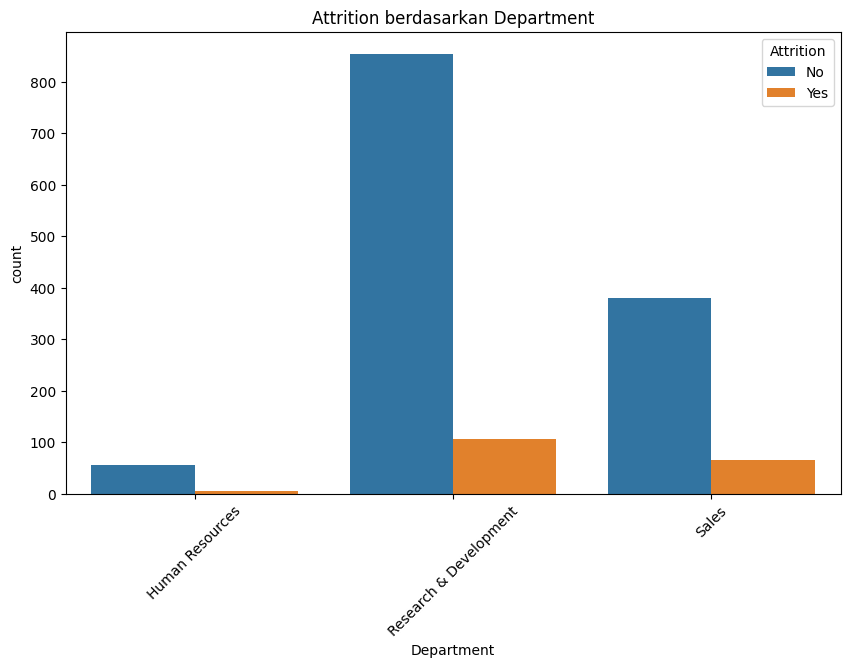

Attrition                      No        Yes
Department                                  
Human Resources         90.476190   9.523810
Research & Development  88.865765  11.134235
Sales                   85.201794  14.798206


In [ ]:
categorical_features = ['Department', 'JobRole', 'MaritalStatus', 'OverTime']

plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition berdasarkan Department')
plt.xticks(rotation=45)
plt.show()

print(pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100)

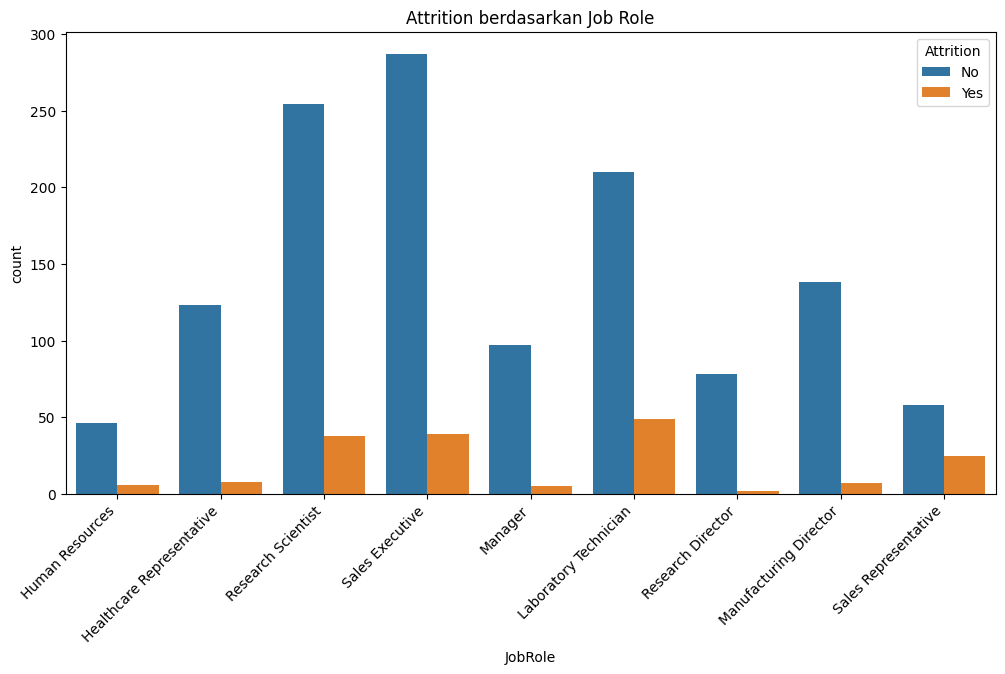

Attrition                         No        Yes
JobRole                                        
Healthcare Representative  93.893130   6.106870
Human Resources            88.461538  11.538462
Laboratory Technician      81.081081  18.918919
Manager                    95.098039   4.901961
Manufacturing Director     95.172414   4.827586
Research Director          97.500000   2.500000
Research Scientist         86.986301  13.013699
Sales Executive            88.036810  11.963190
Sales Representative       69.879518  30.120482


In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition berdasarkan Job Role')
plt.xticks(rotation=45, ha='right')
plt.show()

print(pd.crosstab(df['JobRole'], df['Attrition'], normalize='index') * 100)

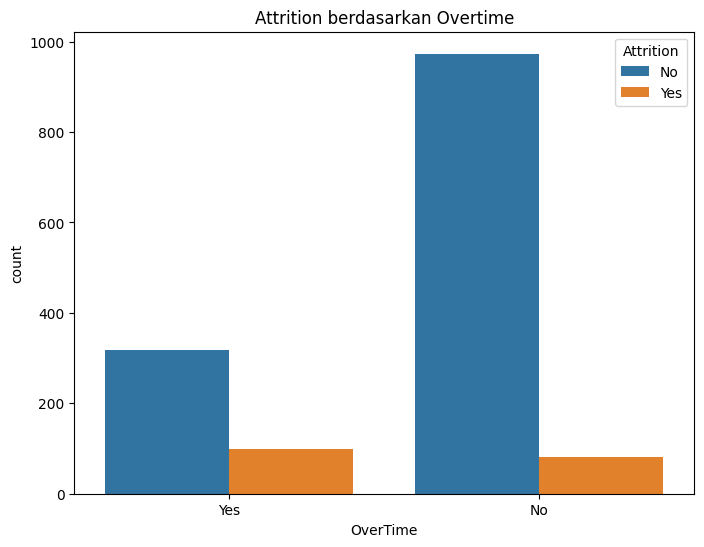

Attrition         No        Yes
OverTime                       
No         92.314991   7.685009
Yes        76.442308  23.557692


In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition berdasarkan Overtime')
plt.show()

print(pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100)

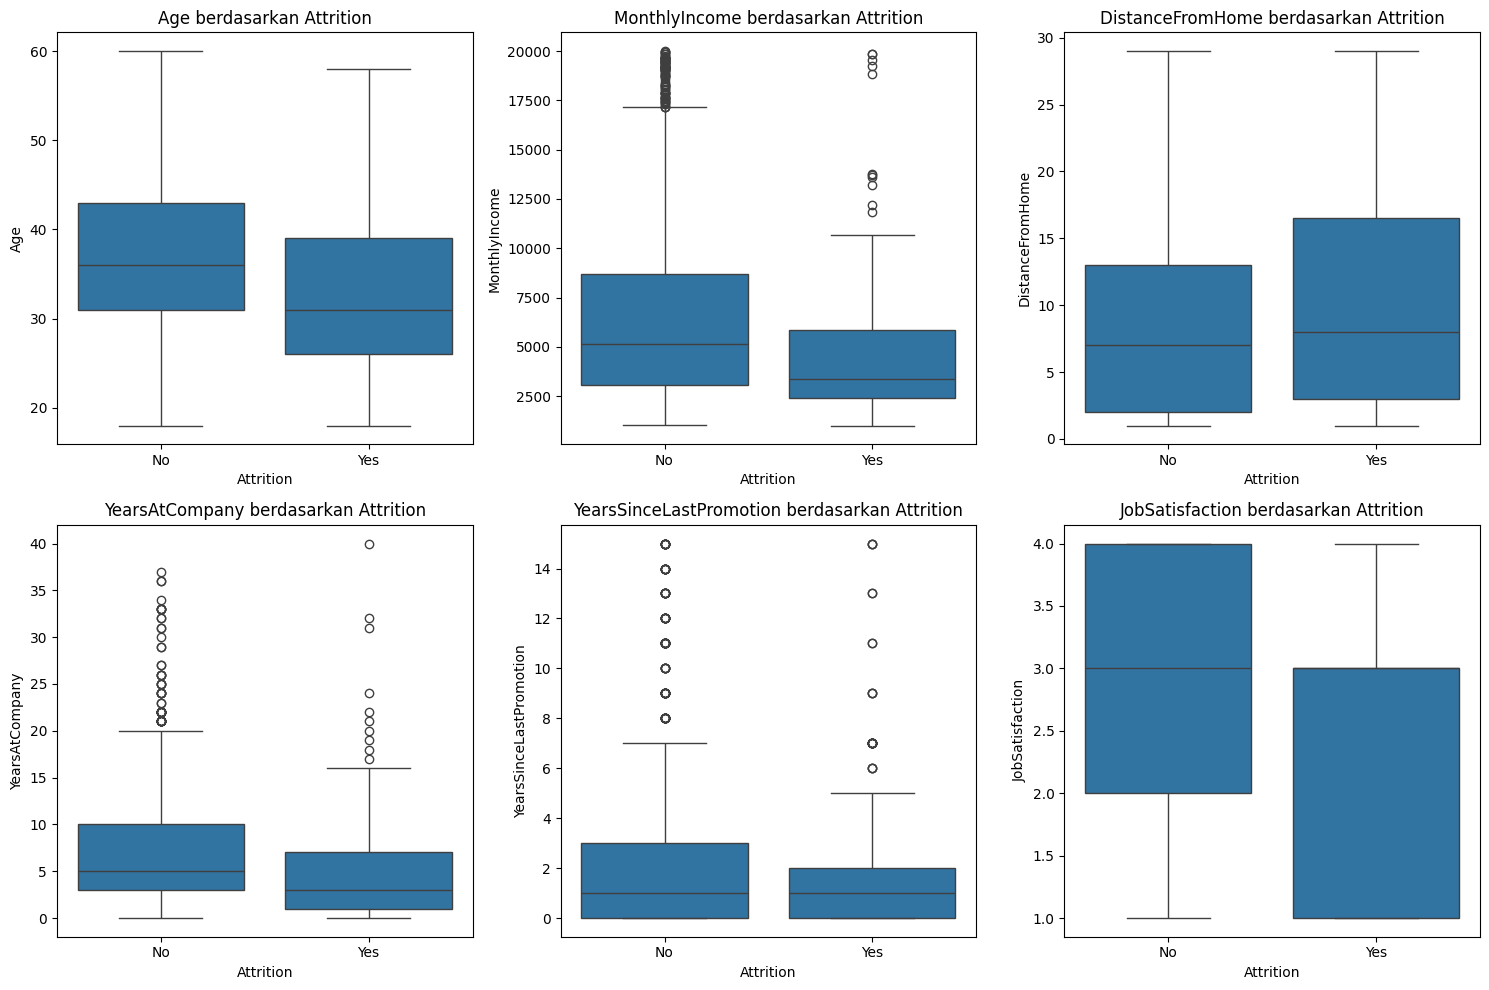

In [ ]:
numerical_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 
                      'YearsSinceLastPromotion', 'JobSatisfaction']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Attrition', y=feature, data=df)
    plt.title(f'{feature} berdasarkan Attrition')
plt.tight_layout()
plt.show()

In [ ]:
attrition_by_dept = df.groupby('Department')['Attrition'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False).reset_index()
attrition_by_dept.columns = ['Department', 'Attrition Rate (%)']
print("Attrition Rate berdasarkan Department:")
print(attrition_by_dept)

attrition_by_role = df.groupby('JobRole')['Attrition'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100).sort_values(ascending=False).reset_index()
attrition_by_role.columns = ['JobRole', 'Attrition Rate (%)']
print("\nAttrition Rate berdasarkan Job Role:")
print(attrition_by_role)

Attrition Rate berdasarkan Department:
               Department  Attrition Rate (%)
0                   Sales           14.798206
1  Research & Development           11.134235
2         Human Resources            9.523810

Attrition Rate berdasarkan Job Role:
                     JobRole  Attrition Rate (%)
0       Sales Representative           30.120482
1      Laboratory Technician           18.918919
2         Research Scientist           13.013699
3            Sales Executive           11.963190
4            Human Resources           11.538462
5  Healthcare Representative            6.106870
6                    Manager            4.901961
7     Manufacturing Director            4.827586
8          Research Director            2.500000


Berdasarkan EDA berikut beberapa temuan yang diperoleh:

**Attrition Rate Keseluruhan**<br>
Dari 1470 karyawan, 237 di antaranya mengalami *attrition*, menghasilkan *attrition rate* sebesar 16.92%. Angka ini mengkonfirmasi bahwa PT Jaya Jaya Maju menghadapi tantangan signifikan dalam retensi karyawan.

**Attrition Berdasarkan Departemen**<br>
Visualisasi menunjukkan bahwa departemen Research & Development memiliki *attrition rate* tertinggi, diikuti oleh Sales, dan Human Resources. Ini mengindikasikan bahwa faktor-faktor spesifik di departemen Sales mungkin berkontribusi pada tingginya turnover.

**Attrition Berdasarkan Peran Pekerjaan (Job Role)**<br>
Analisis *job role* mengungkapkan bahwa Laboratory Technician memiliki *attrition rate* yang sangat tinggi dibandingkan peran lainnya. Ini mungkin disebabkan oleh tekanan kerja yang tinggi, target yang agresif, atau kurangnya dukungan. Peran seperti Sales Executive dan Research Scientist juga menunjukkan tingkat *attrition* yang signifikan.

**Attrition Berdasarkan Status Pernikahan (Marital Status)**<br>
Karyawan dengan status pernikahan Single menunjukkan *attrition rate* tertinggi. Hal ini bisa jadi karena karyawan single memiliki fleksibilitas lebih besar untuk berpindah pekerjaan atau mencari peluang baru tanpa terikat tanggung jawab keluarga yang sama dengan karyawan menikah.

**Attrition Berdasarkan Overtime**<br>
Salah satu temuan paling mencolok adalah dampak *overtime*. Karyawan yang sering lembur memiliki *attrition rate* yang jauh lebih tinggi dibandingkan dengan yang tidak lembur. Ini sangat menekankan pentingnya *work-life balance* dan potensi *burnout* sebagai pemicu *attrition*.

**Attrition Berdasarkan Gender**<br>
Terdapat perbedaan dalam *attrition rate* antara karyawan pria dan wanita, di mana karyawan pria menunjukkan tingkat *attrition* yang lebih tinggi dibandingkan wanita.

**Attrition Berdasarkan Lama Bekerja di Perusahaan (YearsAtCompany)**<br>
*Attrition rate* cenderung lebih tinggi pada karyawan dengan masa kerja yang relatif singkat (0-2 tahun). Ini menyoroti pentingnya program *onboarding* yang efektif dan strategi retensi awal untuk karyawan baru. Setelah beberapa tahun, *attrition rate* cenderung menurun, menunjukkan stabilitas yang lebih besar pada karyawan yang telah lama bekerja.

**Attrition Berdasarkan Pendapatan Bulanan (MonthlyIncome)**<br>
Analisis pendapatan bulanan menunjukkan bahwa *attrition rate* cenderung lebih tinggi pada karyawan dengan pendapatan yang lebih rendah. Ini mengindikasikan bahwa kompensasi mungkin menjadi faktor pendorong *attrition* bagi sebagian karyawan.

**Attrition Berdasarkan Usia (Age)**<br>
Karyawan yang lebih muda (terutama di awal karir) cenderung memiliki *attrition rate* yang lebih tinggi. Ini sejalan dengan temuan *YearsAtCompany*, di mana karyawan baru dan muda mungkin masih mencari jalur karir yang paling sesuai.

**Attrition Berdasarkan Tingkat Pekerjaan (JobLevel)**<br>
Karyawan di *Job Level* 1 (entry level) memiliki *attrition rate* tertinggi. Ini menunjukkan bahwa karyawan di posisi awal mungkin merasa kurang memiliki prospek karir atau pengembangan, sehingga mencari peluang di tempat lain.

**Attrition Berdasarkan Kepuasan Lingkungan Kerja (EnvironmentSatisfaction)**<br>
Ada korelasi yang jelas antara kepuasan lingkungan kerja dan *attrition*. Karyawan dengan tingkat kepuasan lingkungan kerja yang rendah memiliki *attrition rate* yang jauh lebih tinggi. Ini menekankan pentingnya menciptakan lingkungan kerja yang positif dan mendukung.

**Attrition Berdasarkan Kepuasan Kerja (JobSatisfaction)**<br>
Mirip dengan kepuasan lingkungan, kepuasan kerja juga sangat mempengaruhi *attrition*. Karyawan yang tidak puas dengan pekerjaan mereka cenderung lebih mungkin untuk keluar.

**Attrition Berdasarkan Keseimbangan Kehidupan Kerja (WorkLifeBalance)**<br>
Karyawan dengan *work-life balance* yang buruk memiliki *attrition rate* yang lebih tinggi. Ini memperkuat temuan dari analisis *overtime* bahwa keseimbangan antara pekerjaan dan kehidupan pribadi adalah faktor kunci dalam retensi karyawan.

## 3. Pra-pemrosesan Data

In [ ]:
# Mengisi nilai yang hilang di kolom 'Attrition' dengan 0 (False) dan mengubah ke boolean
df['Attrition'] = df['Attrition'].fillna(0).astype(bool)

# Menghapus kolom yang tidak relevan atau memiliki nilai konstan
df = df.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeId'], errors='ignore')

# Mengidentifikasi kolom kategorikal dan numerik
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Mengkodekan kolom kategorikal menggunakan LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,False,1,1444,0,1,4,4,4,1,...,3,2,1,7,2,3,6,2,1,2
1,37,True,2,1141,1,11,2,3,1,0,...,3,1,0,15,2,1,1,0,0,0
2,51,True,2,1323,1,4,4,1,1,1,...,3,3,3,18,2,4,10,0,2,7
3,42,False,1,555,2,26,3,2,3,0,...,3,4,1,23,2,4,20,4,4,8
4,40,False,2,1194,1,2,4,3,3,0,...,3,2,3,20,2,3,5,3,0,2


## 4. Pembagian Data (Fitur dan Target)

In [4]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 5. Scaling Fitur Numerik

In [5]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## 6. Pelatihan Model (Logistic Regression)

In [6]:
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


## 7. Evaluasi Model

In [7]:
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.90

Classification Report:

              precision    recall  f1-score   support

       False       0.90      1.00      0.95       258
        True       0.89      0.22      0.36        36

    accuracy                           0.90       294
   macro avg       0.90      0.61      0.65       294
weighted avg       0.90      0.90      0.87       294


Confusion Matrix:

[[257   1]
 [ 28   8]]


## 8. Menyimpan Model dan Scaler

In [8]:
joblib.dump(model, 'model/logistic_regression_model.pkl')
joblib.dump(scaler, 'model/scaler.pkl')
joblib.dump(X.columns.tolist(), 'model/model_features.pkl')
joblib.dump(categorical_cols.tolist(), 'model/categorical_cols.pkl')
joblib.dump({col: list(df[col].unique()) for col in categorical_cols}, 'model/label_encoders_classes.pkl')
print("Model, scaler, dan daftar fitur telah disimpan.")

Model, scaler, dan daftar fitur telah disimpan.
